#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats

from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')

#Compare income of workers with different education levels by age

##Importing Dataset

In [ ]:
url = 'https://github.com/ddutjnrevenge-universe/QR-Project-2/blob/main/datareg.xlsx?raw=true'
dataReg = pd.read_excel(url)

In [ ]:
dataReg

,HHSEX,AGE,EDUC,INCOME,NETWORTH
0,1,54,11,20290.628707,-400.0
1,1,54,11,20290.628707,-400.0
2,1,54,11,20290.628707,-400.0
3,1,54,11,20290.628707,-400.0
4,1,54,11,20290.628707,-400.0
...,...,...,...,...,...
30070,1,76,13,38552.194543,-110400.0
30071,1,76,13,36523.131673,-101700.0
30072,1,76,13,35508.600237,-120600.0
30073,1,76,13,43624.851720,-130300.0


In [ ]:
sex = dataReg.HHSEX
age = dataReg.AGE
edu = dataReg.EDUC
income = dataReg.INCOME/100000 # unit of income now is $100,000
wealth = dataReg.NETWORTH/100000 # unit of wealth is $100,000
dataReg

,HHSEX,AGE,EDUC,INCOME,NETWORTH
0,1,54,11,20290.628707,-400.0
1,1,54,11,20290.628707,-400.0
2,1,54,11,20290.628707,-400.0
3,1,54,11,20290.628707,-400.0
4,1,54,11,20290.628707,-400.0
...,...,...,...,...,...
30070,1,76,13,38552.194543,-110400.0
30071,1,76,13,36523.131673,-101700.0
30072,1,76,13,35508.600237,-120600.0
30073,1,76,13,43624.851720,-130300.0


##Create 2D and 3D charts and use them to discuss the dynamics of inequality

###Define Age Groups using function

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( x < 31 ):
        return "Below 30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

dataReg['age_group'] = dataReg['AGE'].apply(age_group)
dataReg

,HHSEX,AGE,EDUC,INCOME,NETWORTH,age_group
0,1,54,11,20290.628707,-400.0,51-60
1,1,54,11,20290.628707,-400.0,51-60
2,1,54,11,20290.628707,-400.0,51-60
3,1,54,11,20290.628707,-400.0,51-60
4,1,54,11,20290.628707,-400.0,51-60
...,...,...,...,...,...,...
30070,1,76,13,38552.194543,-110400.0,Greater than 70
30071,1,76,13,36523.131673,-101700.0,Greater than 70
30072,1,76,13,35508.600237,-120600.0,Greater than 70
30073,1,76,13,43624.851720,-130300.0,Greater than 70


###Edu > 11

In [ ]:
#test=dataReg.iloc[:,3:6:2]
#test.age_group.value_counts()
test = dataReg[dataReg.EDUC >11]
test=test.iloc[:,3:6:2]
test.age_group.value_counts()


51-60              6286
41-50              5441
61-70              4784
31-40              4145
Greater than 70    3293
Below 30           3018
Name: age_group, dtype: int64

####2D - 3D Plotting

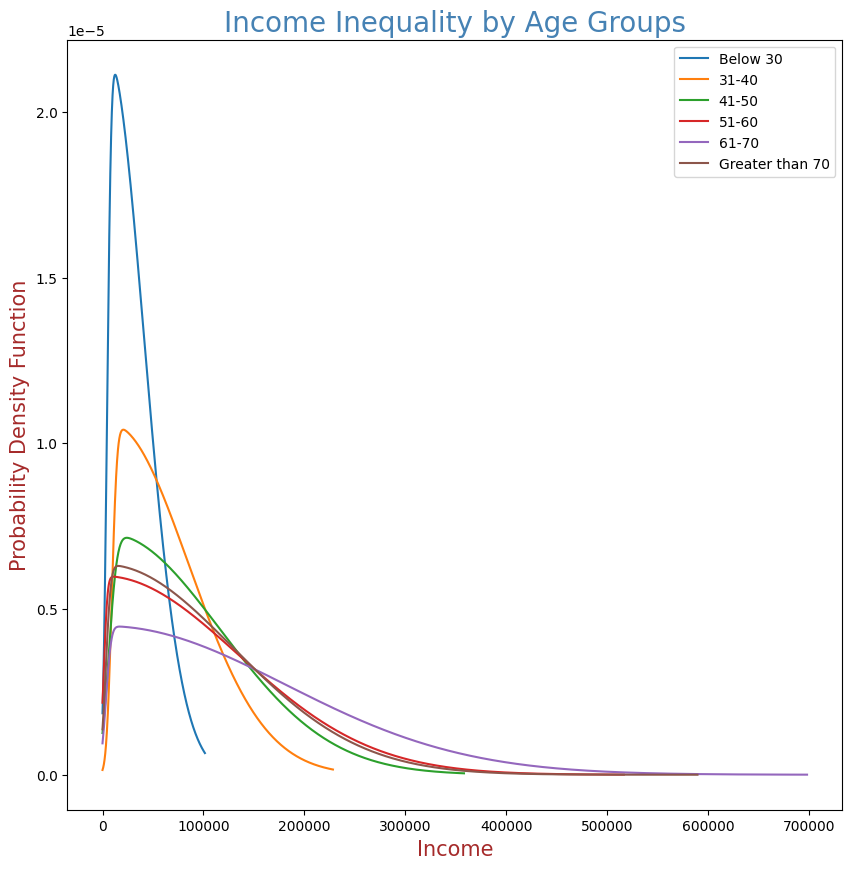

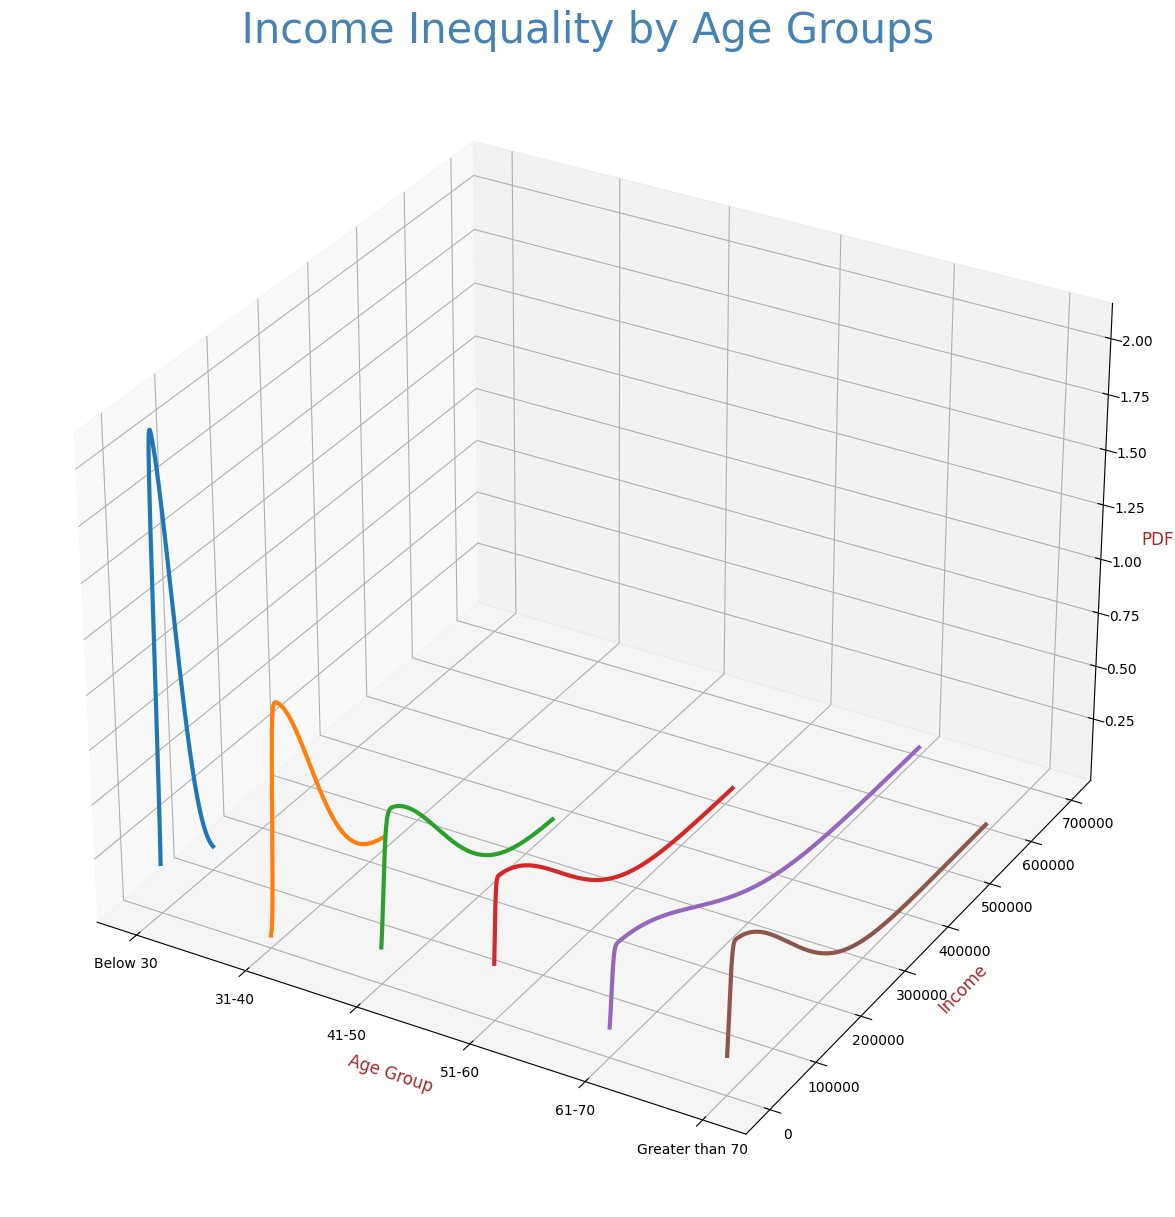

In [ ]:
order_list = {'Below 30':1, '31-40':2, '41-50':3, '51-60':4, '61-70':5, 'Greater than 70':6} #create dictionaries for age groups
#2d plot
ax = plt.figure(figsize=(10,10))
for yo,order in order_list.items():
  data = test.INCOME[test['age_group']==yo].dropna()
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  #whisker
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  #clean data
  a = data[(data>lw)&(data<uw)]
  #fit skewed normal dist
  a_a, loc_a, scale_a = st.skewnorm.fit(a)
  #support wealth
  minincome= a.min()
  maxincome= a.max()
  supportincome = np.linspace(minincome,maxincome,1000)
  #pdf
  pdf = st.skewnorm.pdf(supportincome,a_a,loc_a,scale_a)
  plt.plot(supportincome, pdf,label='%s' %yo)
plt.legend()
plt.xlabel('Income', color='brown', fontsize=15)
plt.ylabel('Probability Density Function', color='brown', fontsize=15)
plt.title('Income Inequality by Age Groups', fontsize=20, color='steelblue')
plt.show()

#3d plotting
dens = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
for yo,order in order_list.items():
  data = test.INCOME[test['age_group']==yo].dropna()
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  #whisker
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  #clean data
  a = data[(data>lw)&(data<uw)]
  #fit skewed normal dist
  a_a, loc_a, scale_a = st.skewnorm.fit(a)
  #support wealth
  minincome= a.min()
  maxincome= a.max()
  supportincome = np.linspace(minincome,maxincome,1000)
  #pdf
  pdf = st.skewnorm.pdf(supportincome,a_a,loc_a,scale_a)
  #plot
  dens.set_xticks(ticks=[1,2,3,4,5,6],labels=['Below 30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70'])
  plt.plot(order*np.ones(len(supportincome)), supportincome, pdf, linewidth=3)
dens.set_xlabel('Age Group', color='brown', fontsize=12)
dens.set_ylabel('Income', color='brown',fontsize=12)
dens.set_zlabel('PDF',color='brown',fontsize=12)
dens.set_title('      Income Inequality by Age Groups      ', loc='center', fontsize=30, color = 'steelblue')
plt.show()

####Confidence Interval

In [ ]:
u50 = dataReg[(dataReg.AGE < 50) & (dataReg.EDUC > 11)].INCOME
o50 = dataReg[(dataReg.AGE > 50) & (dataReg.EDUC > 11)].INCOME

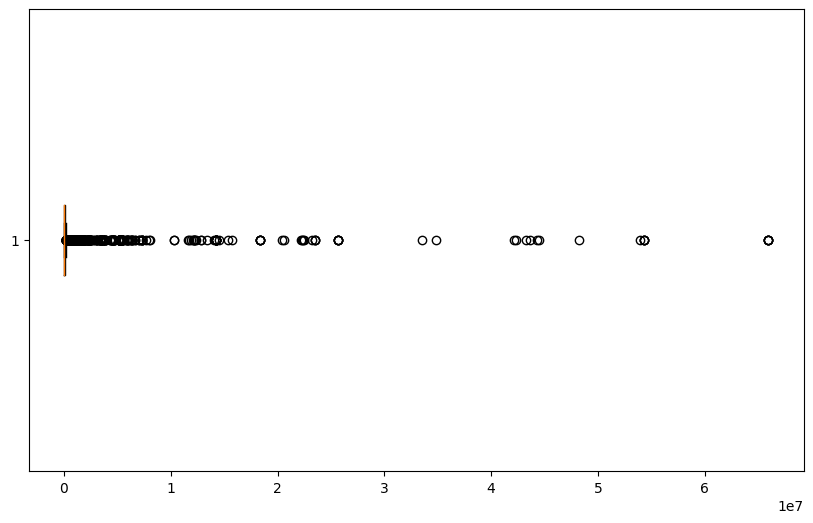

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(u50, vert = False)
q1_u50, q3_u50 = u50.quantile([0.25,0.75])
low_u50 = q1_u50 - 1.5*(q3_u50 - q1_u50)
upp_u50 = q3_u50 + 1.5*(q3_u50 - q1_u50)
u50 = u50[(u50<=upp_u50)&(u50>=low_u50)]

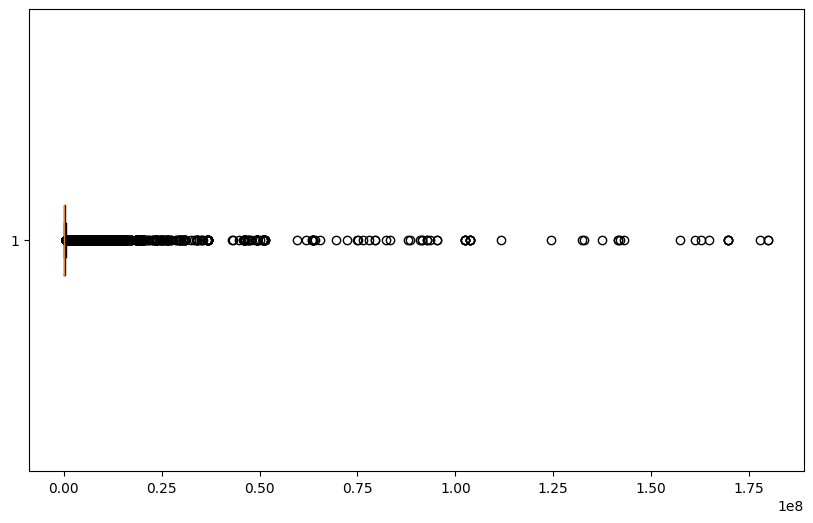

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(o50, vert = False)
q1_o50, q3_o50 = o50.quantile([0.25,0.75])
low_o50 = q1_o50 - 1.5*(q3_o50 - q1_o50)
upp_o50 = q3_o50 + 1.5*(q3_o50 - q1_o50)
o50 = o50[(o50<=upp_o50)&(o50>=low_o50)]

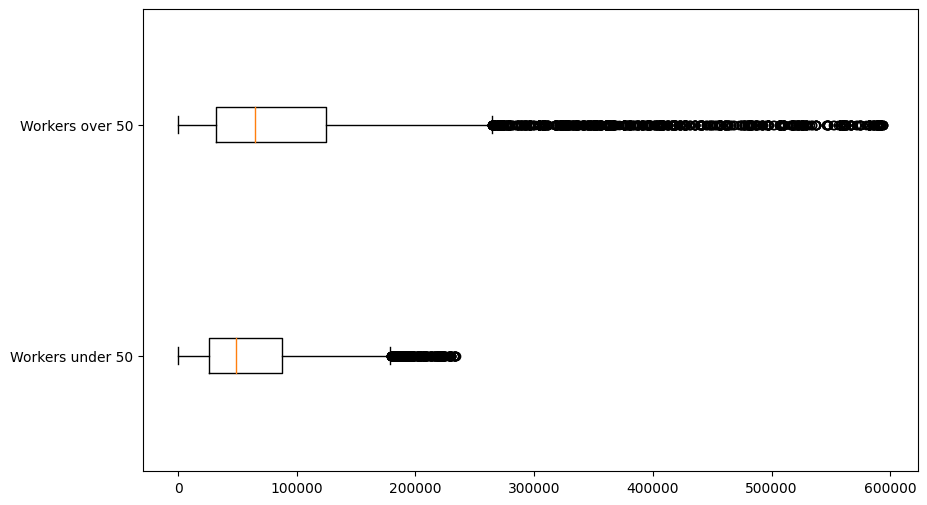

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot ([u50, o50], labels = ["Workers under 50", "Workers over 50"], vert = False)
plt.show()

In [ ]:
ciu50 = st.norm.interval(0.95, loc=u50.mean(),scale=u50.sem())
ciu50

(61788.002829176505, 63627.27913413975)

In [ ]:
cio50 = st.norm.interval(0.95, loc=o50.mean(),scale=o50.sem())
cio50

(99670.42978274703, 103648.1069062207)

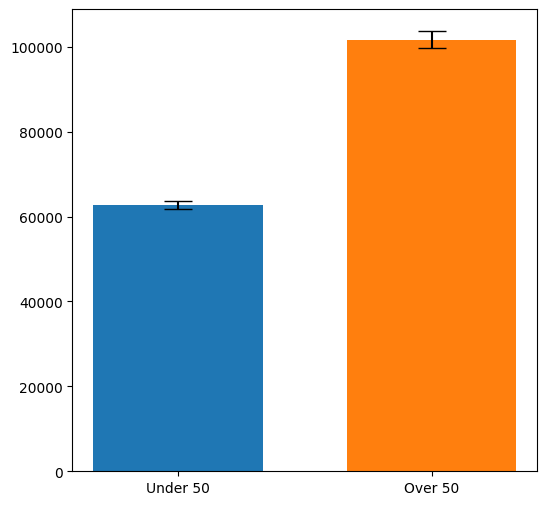

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(1, u50.mean(), width = 0.1, capsize=10, yerr = (ciu50[1]-ciu50[0])/2)
plt.bar(1.15, o50.mean(), width = 0.1, capsize=10, yerr = (cio50[1]-cio50[0])/2)
plt.xticks([1,1.15],['Under 50','Over 50'])
plt.show()

####p-value

In [ ]:
st.shapiro(u50)

ShapiroResult(statistic=0.8857054710388184, pvalue=0.0)

In [ ]:
st.shapiro(o50)

ShapiroResult(statistic=0.7417239546775818, pvalue=0.0)

In [ ]:
st.ttest_ind(u50,o50)

Ttest_indResult(statistic=-33.75501518789396, pvalue=1.0933837295048817e-243)

###Edu < 11

#####2d 3d

In [ ]:
test1 = dataReg[dataReg.EDUC <11]
test1 =test1.iloc[:,3:6:2]
test1.age_group.value_counts()

Greater than 70    566
51-60              425
41-50              376
31-40              374
61-70              336
Below 30           210
Name: age_group, dtype: int64

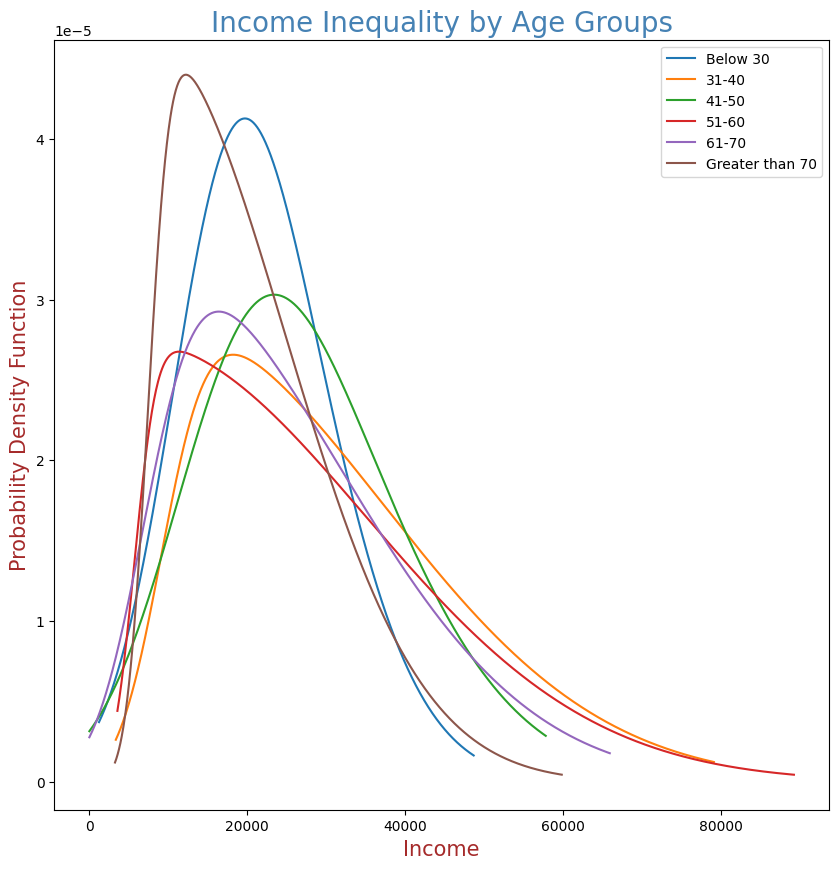

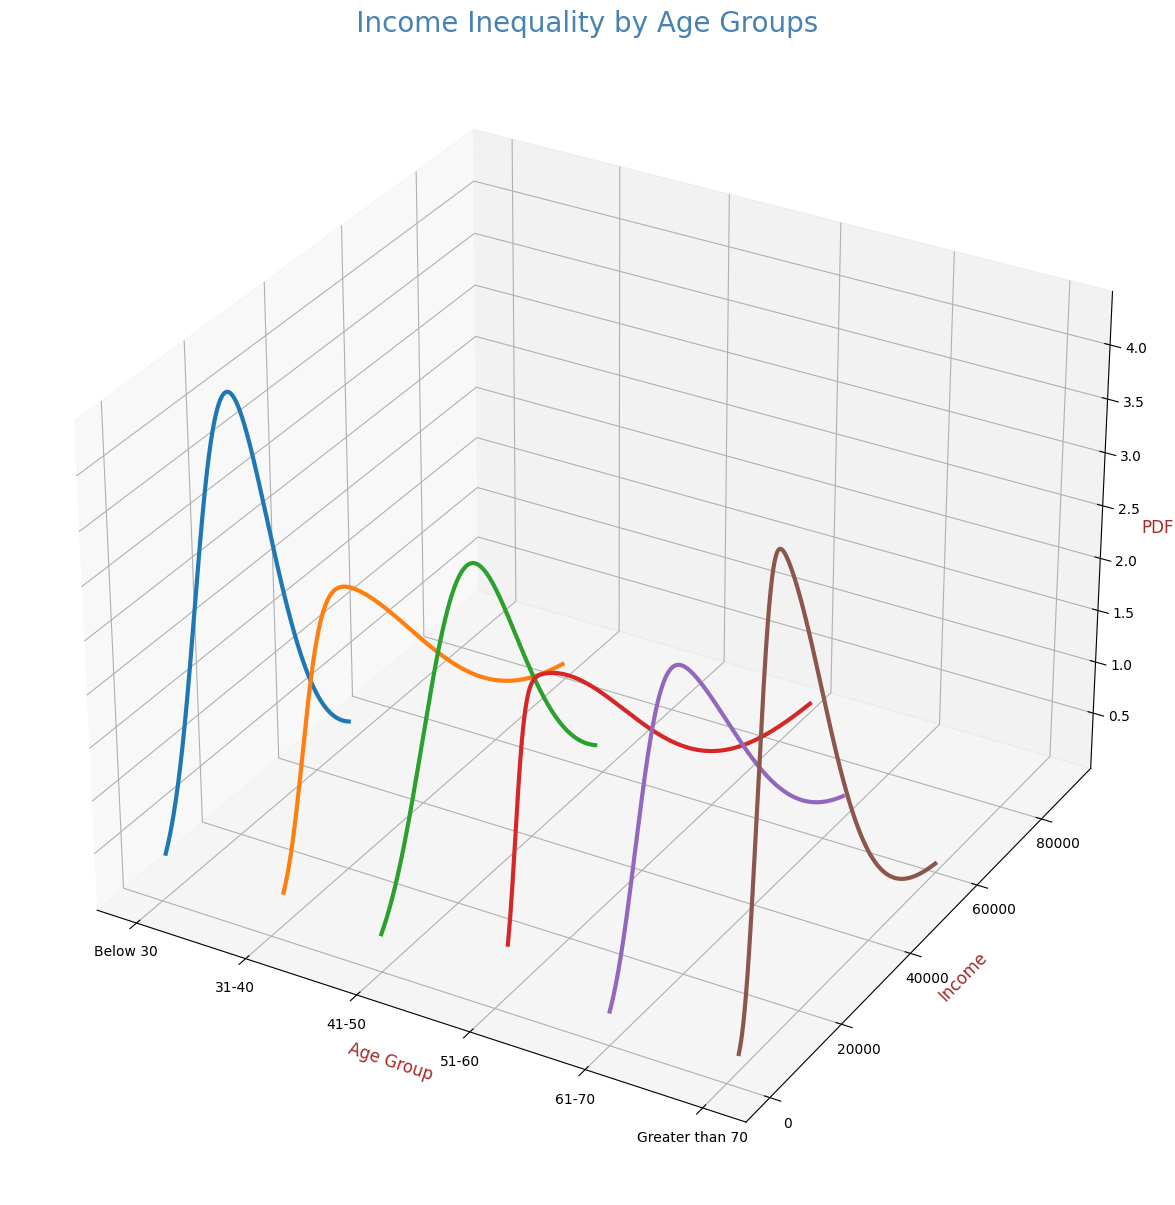

In [ ]:
order_list = {'Below 30':1, '31-40':2, '41-50':3, '51-60':4, '61-70':5, 'Greater than 70':6} #create dictionaries for age groups
#2d plot
ax = plt.figure(figsize=(10,10))
for yo,order in order_list.items():
  data = test1.INCOME[test1['age_group']==yo].dropna()
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  #whisker
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  #clean data
  a = data[(data>lw)&(data<uw)]
  #fit skewed normal dist
  a_a, loc_a, scale_a = st.skewnorm.fit(a)
  #support wealth
  minincome= a.min()
  maxincome= a.max()
  supportincome = np.linspace(minincome,maxincome,1000)
  #pdf
  pdf = st.skewnorm.pdf(supportincome,a_a,loc_a,scale_a)
  plt.plot(supportincome, pdf,label='%s' %yo)
plt.legend()
plt.xlabel('Income', color='brown', fontsize=15)
plt.ylabel('Probability Density Function', color='brown', fontsize=15)
plt.title('Income Inequality by Age Groups', fontsize=20, color='steelblue')
plt.show()

#3d plotting
dens = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
for yo,order in order_list.items():
  data = test1.INCOME[test1['age_group']==yo].dropna()
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  #whisker
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  #clean data
  a = data[(data>lw)&(data<uw)]
  #fit skewed normal dist
  a_a, loc_a, scale_a = st.skewnorm.fit(a)
  #support wealth
  minincome= a.min()
  maxincome= a.max()
  supportincome = np.linspace(minincome,maxincome,1000)
  #pdf
  pdf = st.skewnorm.pdf(supportincome,a_a,loc_a,scale_a)
  #plot
  dens.set_xticks(ticks=[1,2,3,4,5,6],labels=['Below 30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70'])
  plt.plot(order*np.ones(len(supportincome)), supportincome, pdf, linewidth=3)
dens.set_xlabel('Age Group', color='brown', fontsize=12)
dens.set_ylabel('Income', color='brown',fontsize=12)
dens.set_zlabel('PDF',color='brown',fontsize=12)
dens.set_title('      Income Inequality by Age Groups      ', loc='center', fontsize=20, color = 'steelblue')
plt.show()

####Confidence Interval

In [ ]:
u50_u11 = dataReg[(dataReg.AGE < 50) & (dataReg.EDUC < 11)].INCOME
o50_u11 = dataReg[(dataReg.AGE > 50) & (dataReg.EDUC < 11)].INCOME

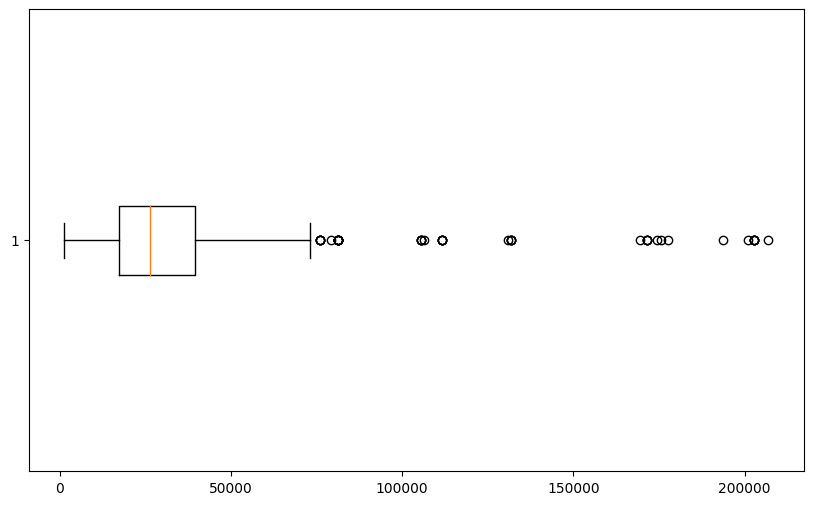

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(u50_u11, vert = False)
q1_u50_u11, q3_u50_u11 = u50_u11.quantile([0.25,0.75])
low_u50_u11 = q1_u50_u11 - 1.5*(q3_u50_u11 - q1_u50_u11)
upp_u50_u11 = q3_u50_u11 + 1.5*(q3_u50_u11 - q1_u50_u11)
u50_u11 = u50_u11[(u50_u11<=upp_u50_u11)&(u50_u11>=low_u50_u11)]

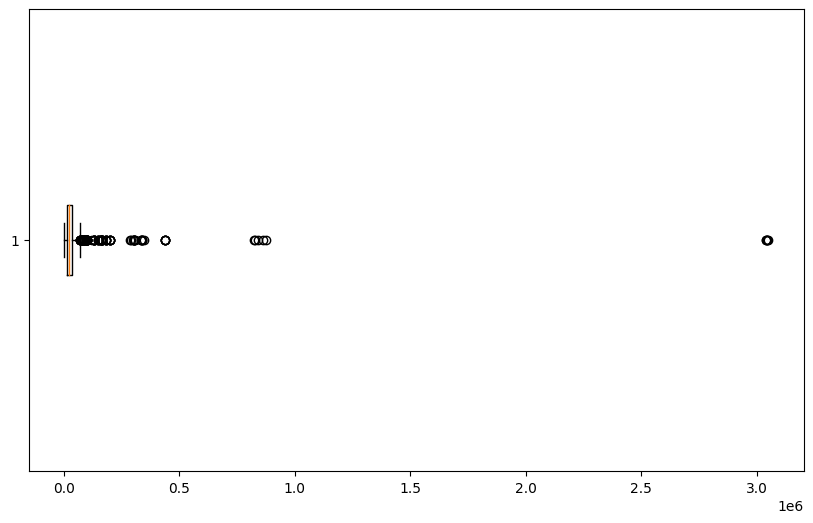

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(o50_u11, vert = False)
q1_o50_u11, q3_o50_u11 = o50_u11.quantile([0.25,0.75])
low_o50_u11 = q1_o50_u11 - 1.5*(q3_o50_u11 - q1_o50_u11)
upp_o50_u11 = q3_o50_u11 + 1.5*(q3_o50_u11 - q1_o50_u11)
o50_u11 = o50_u11[(o50_u11<=upp_o50_u11)&(o50_u11>=low_o50_u11)]

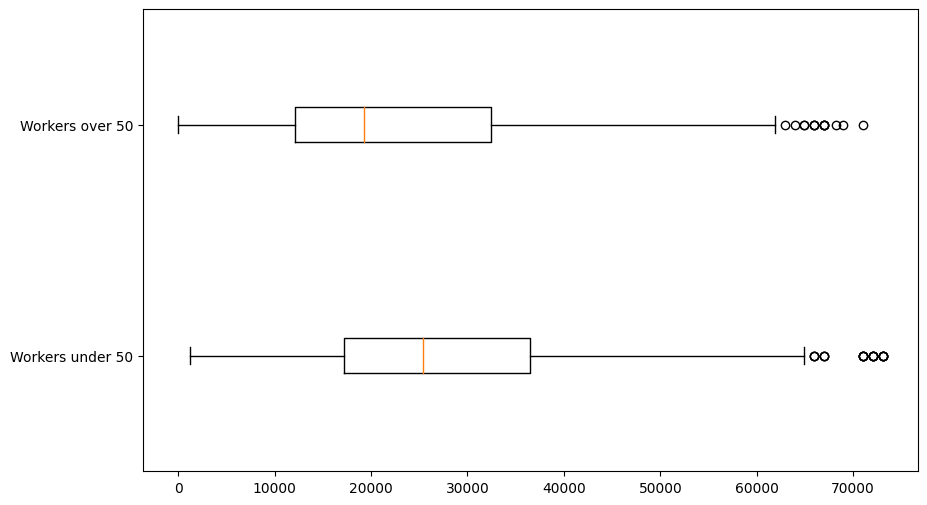

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot ([u50_u11, o50_u11], labels = ["Workers under 50", "Workers over 50"], vert = False)
plt.show()

In [ ]:
ciu50_u11 = st.norm.interval(0.95, loc=u50_u11.mean(),scale=u50_u11.sem())
ciu50_u11

(27258.1779495289, 29257.847087795963)

In [ ]:
cio50_u11 = st.norm.interval(0.95, loc=o50_u11.mean(),scale=o50_u11.sem())
cio50_u11

(23042.90725465481, 24675.401325914925)

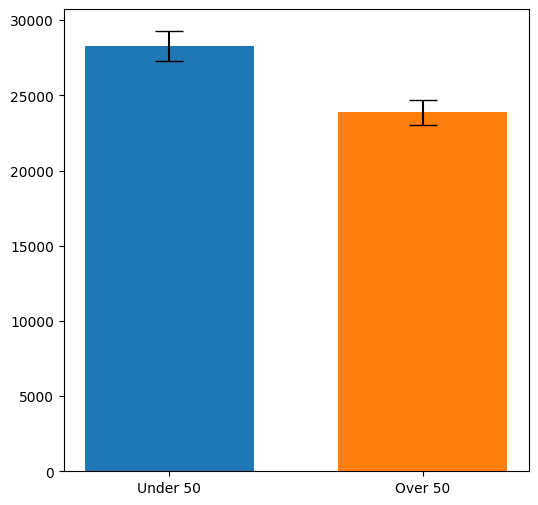

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(1, u50_u11.mean(), width = 0.1, capsize=10, yerr = (ciu50_u11[1]-ciu50_u11[0])/2)
plt.bar(1.15, o50_u11.mean(), width = 0.1, capsize=10, yerr = (cio50_u11[1]-cio50_u11[0])/2)
plt.xticks([1,1.15],['Under 50','Over 50'])
plt.show()

####p-value

In [ ]:
st.shapiro(u50_u11)

ShapiroResult(statistic=0.9547148942947388, pvalue=9.308555394728227e-16)

In [ ]:
st.shapiro(o50_u11)

ShapiroResult(statistic=0.9050381779670715, pvalue=5.769119296552076e-27)

In [ ]:
st.ttest_ind(u50_u11,o50_u11)

Ttest_indResult(statistic=6.71589400245507, pvalue=2.3983540849966946e-11)

###Combine

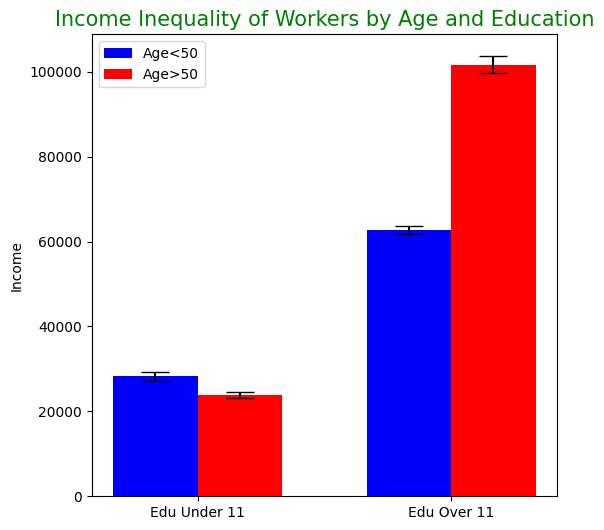

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(1, u50_u11.mean(), width = 0.1, capsize=10, yerr = (ciu50_u11[1]-ciu50_u11[0])/2, color='b', label='Age<50')
plt.bar(1.1, o50_u11.mean(), width = 0.1, capsize=10, yerr = (cio50_u11[1]-cio50_u11[0])/2, color='r')
plt.bar(1.3, u50.mean(), width = 0.1, capsize=10, yerr = (ciu50[1]-ciu50[0])/2, color='b')
plt.bar(1.4, o50.mean(), width = 0.1, capsize=10, yerr = (cio50[1]-cio50[0])/2, color='r', label='Age>50')
plt.xticks([1.05,1.35],['Edu Under 11','Edu Over 11'])
plt.ylabel('Income')
plt.title('Income Inequality of Workers by Age and Education', fontsize=15, color='g')
plt.legend()
plt.show()

#Absent Hours

##Importing Datasets

In [ ]:
url_age = 'https://raw.githubusercontent.com/ddutjnrevenge-universe/QR-Project-2/main/employee_addv.csv'
data2 = pd.read_csv(url_age)

In [ ]:
data2

,first_name,last_name,gender,age,length_service,absent_hours,distribution_centers_id,entry_age
0,Gutierrez,Molly,F,32.028816,6.018478,36.577305,5,26.010338
1,Hardwick,Stephen,M,40.320900,5.532445,30.165071,9,34.788456
2,Delgado,Chester,M,48.822050,4.389973,83.807800,10,44.432076
3,Simon,Irene,F,44.599358,3.081736,70.020164,2,41.517620
4,Delvalle,Edward,M,35.697876,3.619092,0.000000,4,32.078785
...,...,...,...,...,...,...,...,...
8331,Coniglio,Bianca,F,46.057545,4.838288,93.665110,9,41.219257
8332,Cox,Jimmie,M,34.455490,2.427274,0.000000,1,32.028217
8333,Hawkins,Mary,F,58.347160,4.009393,176.356930,9,54.337770
8334,Proctor,Theresa,F,43.340614,6.154837,60.321920,7,37.185776


##Define Age Groups

In [ ]:
def divide(x):
  x=int(x)
  x=abs(x)
  if( x < 31 ):
    return "Below 30"
  if( 30 < x < 41 ):
    return "31-40"
  if( 40 < x < 51 ):
    return "41-50"
  else:
    return "Greater than 50"

data2['age_group'] = data2['age'].apply(divide)
data2

,first_name,last_name,gender,age,length_service,absent_hours,distribution_centers_id,entry_age,age_group
0,Gutierrez,Molly,F,32.028816,6.018478,36.577305,5,26.010338,31-40
1,Hardwick,Stephen,M,40.320900,5.532445,30.165071,9,34.788456,31-40
2,Delgado,Chester,M,48.822050,4.389973,83.807800,10,44.432076,41-50
3,Simon,Irene,F,44.599358,3.081736,70.020164,2,41.517620,41-50
4,Delvalle,Edward,M,35.697876,3.619092,0.000000,4,32.078785,31-40
...,...,...,...,...,...,...,...,...,...
8331,Coniglio,Bianca,F,46.057545,4.838288,93.665110,9,41.219257,41-50
8332,Cox,Jimmie,M,34.455490,2.427274,0.000000,1,32.028217,31-40
8333,Hawkins,Mary,F,58.347160,4.009393,176.356930,9,54.337770,Greater than 50
8334,Proctor,Theresa,F,43.340614,6.154837,60.321920,7,37.185776,41-50


In [ ]:
hrs = data2.iloc[:, 5:9:3]
hrs.age_group.value_counts()


41-50              2999
31-40              2710
Greater than 50    1512
Below 30           1115
Name: age_group, dtype: int64

###2d - 3d Plot

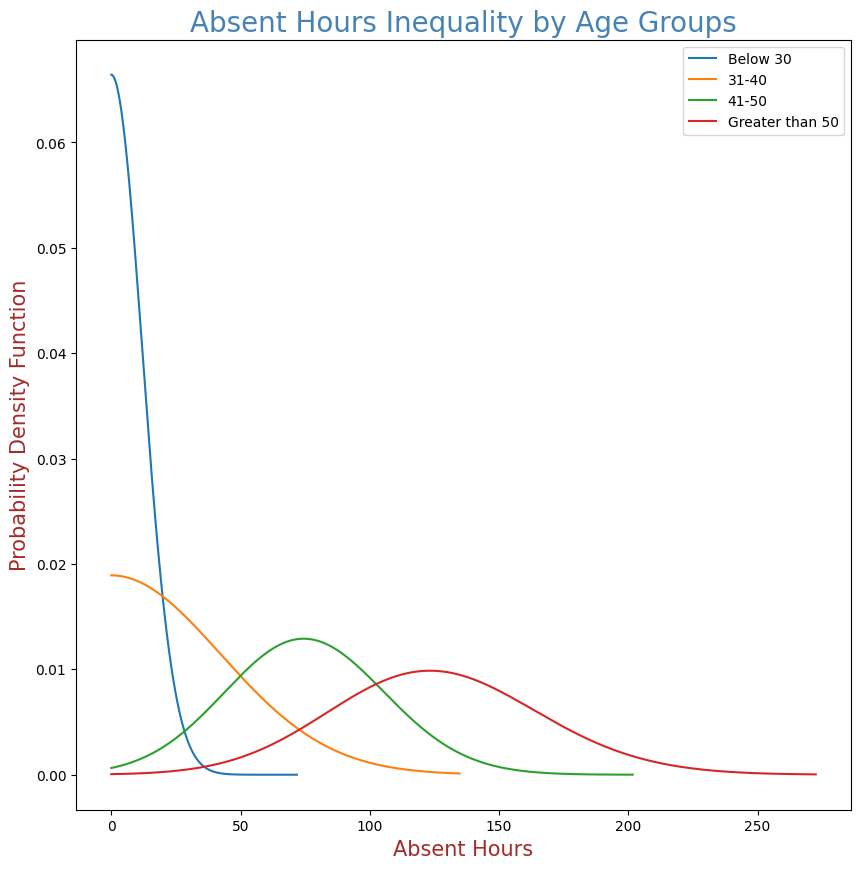

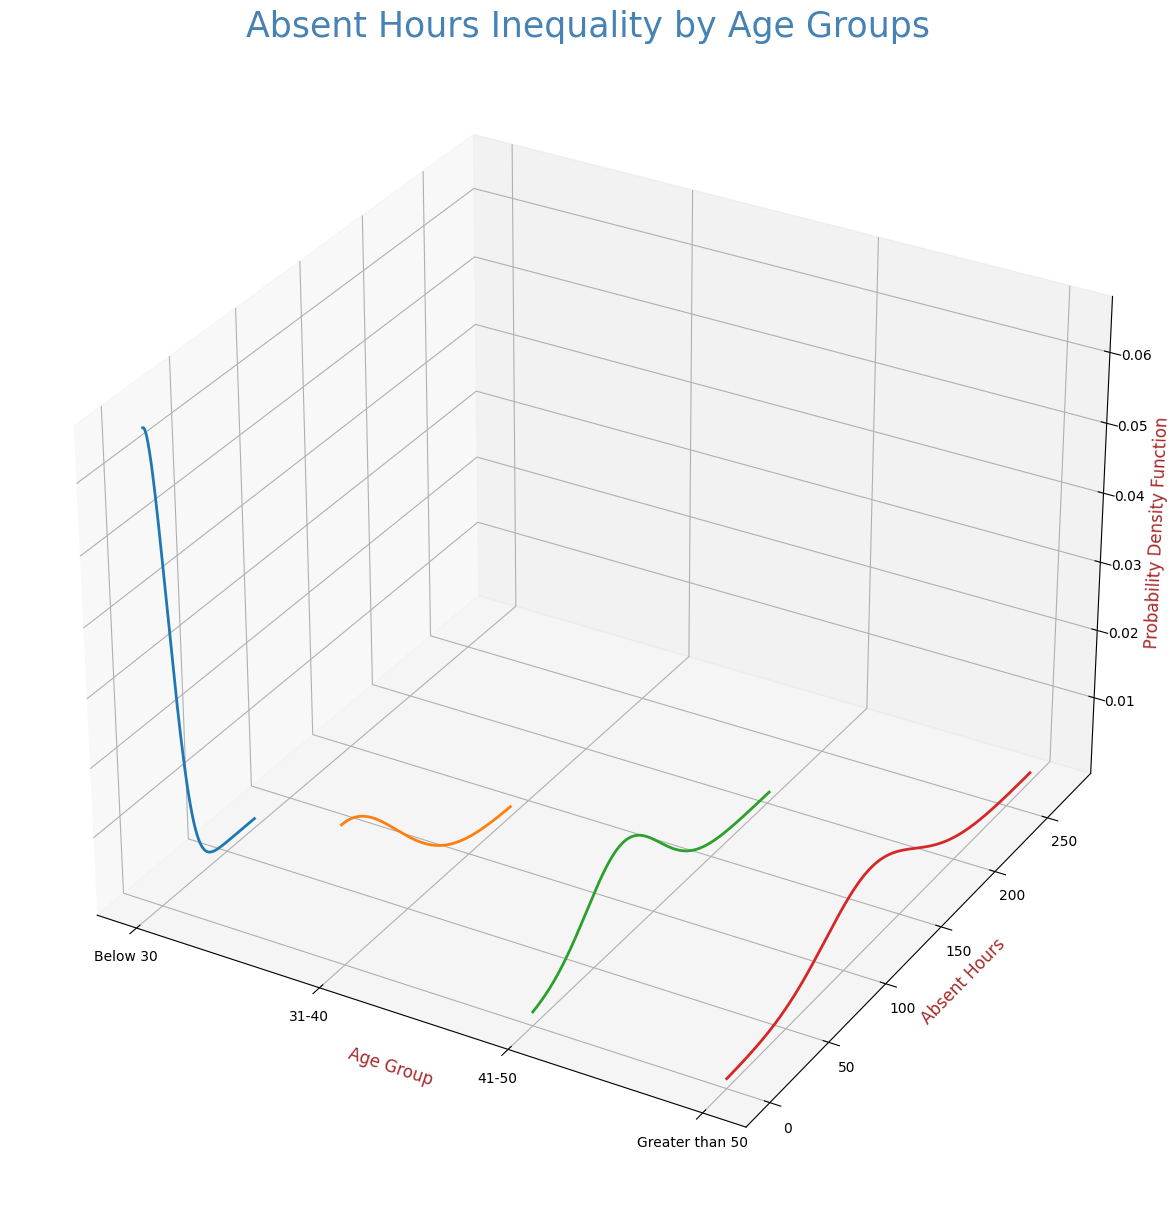

In [ ]:
age_list = {'Below 30':1, '31-40':2, '41-50':3, 'Greater than 50':4}

#2d plot
plot_2d = plt.figure(figsize=(10,10))
for yo,order in age_list.items():
  hrs_test = hrs.absent_hours[hrs['age_group']==yo].dropna()
  # q1_hrs =hours.quantile(0.25)
  # q3_hrs =hours.quantile(0.75)
  # iqr_hrs=q3_hrs-q1_hrs
  # #whisker
  # lw_hrs=q1_hrs-(1.5*iqr_hrs)
  # uw_hrs=q3_hrs+(1.5*iqr_hrs)
  # #clean data
  # hrs_test = hours[(hours>=lw_hrs)&(hours<=uw_hrs)]
  #fit skewed normal dist
  a_hrs, loc_hrs, scale_hrs = st.skewnorm.fit(hrs_test)
  #support wealth
  minhrs= hrs_test.min()
  maxhrs= hrs_test.max()
  supporthrs = np.linspace(minhrs,maxhrs,1000)
  #pdf
  pdf_hrs = st.skewnorm.pdf(supporthrs,a_hrs,loc_hrs,scale_hrs)
  plt.plot(supporthrs, pdf_hrs,label='%s' %yo, linewidth=1.5)
plt.legend()
plt.xlabel('Absent Hours', color='brown', fontsize=15)
plt.ylabel('Probability Density Function', color='brown', fontsize=15)
plt.title('Absent Hours Inequality by Age Groups', fontsize=20, color='steelblue')
plt.show()


#3d_plot
plot_3d = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
for yo,order in age_list.items():
  hrs_test = hrs.absent_hours[hrs['age_group']==yo].dropna()
  # q1_hrs =hours.quantile(0.25)
  # q3_hrs =hours.quantile(0.75)
  # iqr_hrs=q3_hrs-q1_hrs
  # #whisker
  # lw_hrs=q1_hrs-(1.5*iqr_hrs)
  # uw_hrs=q3_hrs+(1.5*iqr_hrs)
  # #clean data
  # hrs_test = hours[(hours>=lw_hrs)&(hours<=uw_hrs)]
  #fit skewed normal dist
  a_hrs, loc_hrs, scale_hrs = st.skewnorm.fit(hrs_test)
  #support wealth
  minhrs= hrs_test.min()
  maxhrs= hrs_test.max()
  supporthrs = np.linspace(minhrs,maxhrs,1000)
  #pdf
  pdf_hrs = st.skewnorm.pdf(supporthrs,a_hrs,loc_hrs,scale_hrs)
  #plot
  plot_3d.set_xticks(ticks=[1,2,3,4],labels=['Below 30', '31-40', '41-50','Greater than 50'])
  plt.plot(order*np.ones(len(supporthrs)), supporthrs, pdf_hrs, linewidth=2)
plot_3d.set_xlabel('Age Group', color='brown', fontsize=12)
plot_3d.set_ylabel('Absent Hours', color='brown',fontsize=12)
plot_3d.set_zlabel('Probability Density Function',color='brown',fontsize=12)
plot_3d.set_title('      Absent Hours Inequality by Age Groups      ', loc='center', fontsize=25, color = 'steelblue')
plt.show()

###Scatter Plot & Linear Line

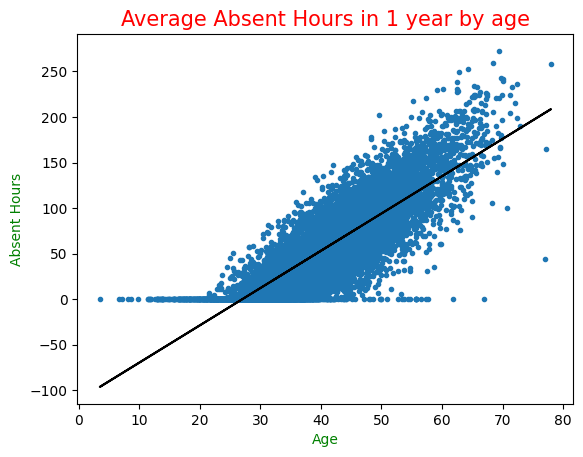

In [ ]:
plt.scatter(data2.age, data2.absent_hours,s=9)
c, d = np.polyfit(data2.age,data2.absent_hours,1)
plt.plot(data2.age,c*data2.age+d,'k')
plt.xlabel('Age', color='g')
plt.ylabel('Absent Hours', color='g')
plt.title('Average Absent Hours in 1 year by age', fontsize=15, color='r')

plt.show()

#Promotion

##Importing Datasets

In [ ]:
url_promotion = 'https://github.com/ddutjnrevenge-universe/QR-Project-2/raw/main/Promotion-by-age.csv'
promotion = pd.read_csv(url_promotion)
promotion


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [ ]:
promoted = promotion[promotion.is_promoted == 1].age
plt.show()

##Histogram & Curve Fitting

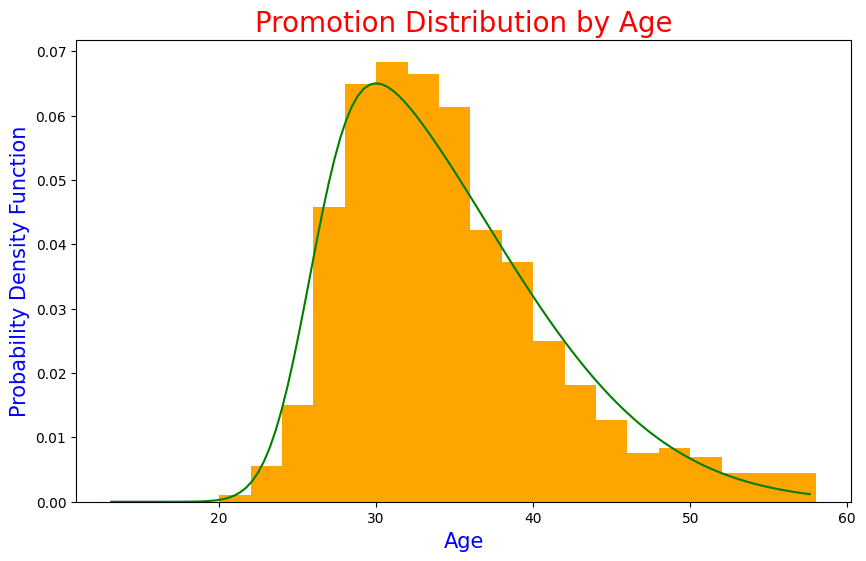

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(promoted, bins=np.arange(promoted.min(), promoted.max(),2), density=True, color='orange')
mu = promoted.mean()
sigma = promoted.std()
x_promoted =np.linspace(mu-3*sigma,mu+3*sigma+2,120)
a4, loc4, scale4 = st.skewnorm.fit(promoted)
plt.plot(x_promoted, st.skewnorm.pdf(x_promoted, a4, loc=loc4, scale=scale4), color='g')
plt.xlabel('Age', fontsize=15, color='b')
plt.ylabel('Probability Density Function', fontsize=15, color='b')
plt.title('Promotion Distribution by Age', fontsize=20, color='r')
plt.show()
